In [1]:
import cv2
import dlib
import os
import numpy as np
import matplotlib.pyplot as plt

def crop_to_face_and_save(face_ref, reference_img):
    # Extract the face region from the reference image
    x, y, w, h = face_ref.left(), face_ref.top(), face_ref.width(), face_ref.height()
    face_img = reference_img[y:y+h, x:x+w]
    plt.imshow(face_img)

    # Save the extracted face region
    cv2.imwrite('reference_face.jpg', face_img)

#def match_bowler(reference_image_path, frames_folder, match_threshold=0.6):

# Initialize face detector and face recognition model
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Shape predictor model
face_rec_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')  # Face recognition model

#detector(gray_ref)


In [3]:

def display_img_and_face(reference_image_path):

    # Load the reference image and detect faces
    reference_img = cv2.imread(reference_image_path)
    print(reference_img.shape)
    gray_ref = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_ref)

    plt.figure()
    faces_ref = detector(gray_ref)
    print(faces_ref)
    crop_to_face_and_save(faces_ref[0], reference_img)


(1048, 1892, 3)
rectangles[[(1149, 573) (1235, 659)]]


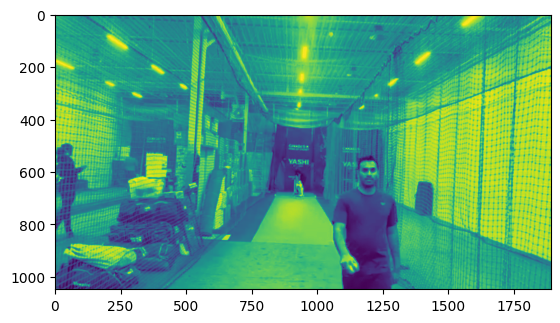

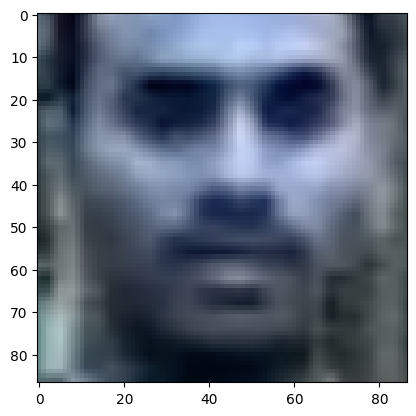

In [4]:
display_img_and_face('front.png')

rectangles[[(77, 37) (149, 109)]]


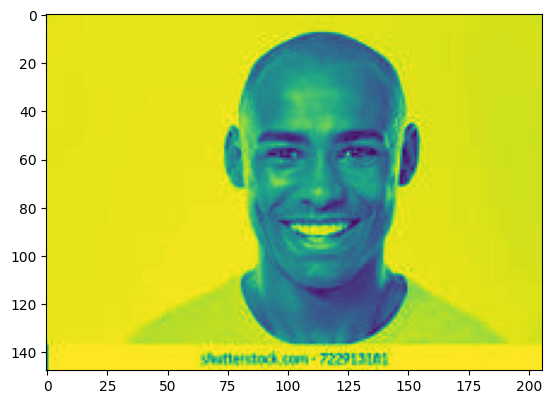

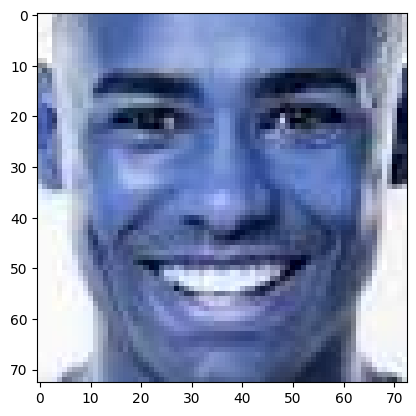

In [48]:
display_img_and_face('download.jpeg')

rectangles[[(517, 213) (589, 285)]]


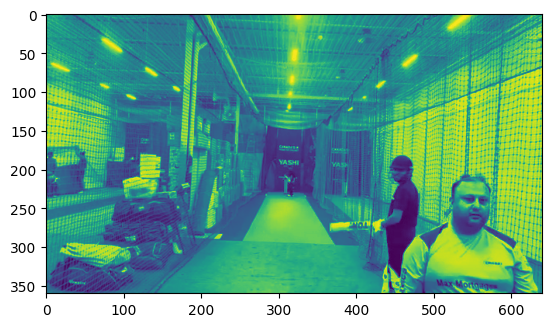

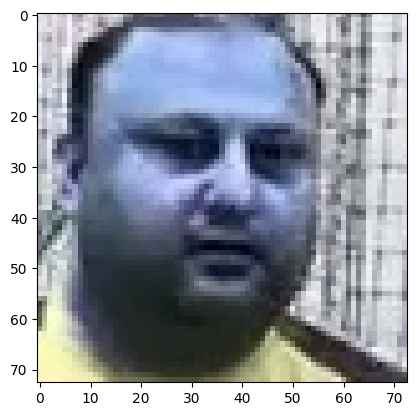

In [49]:
display_img_and_face('face_frames/frame_0.jpg')

rectangles[[(485, 205) (557, 277)]]


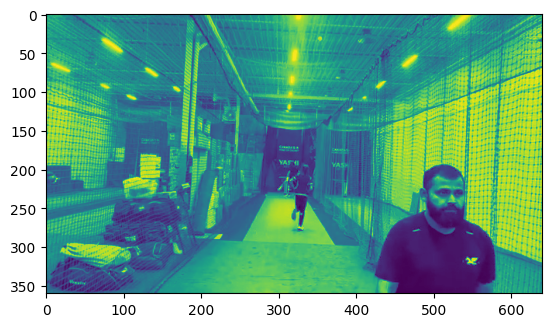

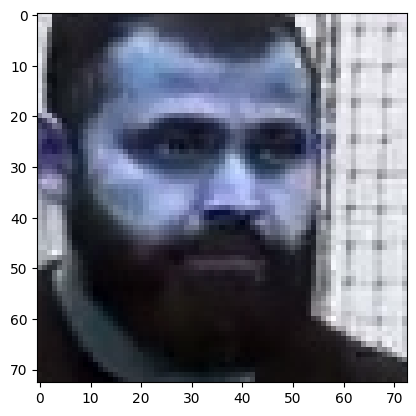

In [50]:
display_img_and_face('face_frames/frame_1000.jpg')

In [ ]:
from ultralytics import YOLO
import cv2

# Load YOLOv8 model trained on COCO (detects people, cricket bats, etc.)
model = YOLO("yolov8n.pt")

def detect_players(image_path):
    img = cv2.imread(image_path)
    results = model(img)  # Run inference

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            label = model.names[int(box.cls[0])]  # Class label
            
            if label == "person":
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bbox
            
    cv2.imshow("Players Detected", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
detect_players("front.png")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/shahzebnaveed/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 8.06MB/s]



0: 384x640 3 persons, 58.2ms
Speed: 5.0ms preprocess, 58.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
